## Temporal dynamics of the HRF (Hemodynamic Response Function)

The hemodynamic response lags the event onset that initiates it by 1-2 seconds. After this latency, the metabolic activity required for increased neuronal activity results in an increased flow of oxygenated blood. More oxygen is supplied to the area than extracted, resulting in a decrease in the amount of deoxygenated hemoglobin in the voxel. This signal increase is about 2 seconds after the onset of neuronal activity and ultimately grows to its peak at 5 seconds. This is important to remember when you are modelling your data, as you need to take into account that the time-point of the peak signal DOES NOT align to the task.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import nipy.modalities.fmri.hemodynamic_models as hemodynamic_models

import seaborn as sns

In [2]:
import mvpa2.suite as mv

/usr/local/lib/python3.6/site-packages/mvpa2/base/dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
Failed to import duecredit due to No module named 'duecredit'
/usr/local/lib/python3.6/site-packages/mvpa2/base/dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
/usr/local/lib/python3.6/site-packages/mvpa2/base/dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
/usr/local/lib/python3.6/site-packages/mvpa2/base/dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
/usr/local/lib/python3.6/site-packages/mvpa2/datasets/sources/skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
<string>:6

In [3]:
hrf_gen=lambda t: mv.misc.fx.double_gamma_hrf(t) - mv.misc.fx.single_gamma_hrf(t, 0.8, 1, 0.05)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-03-05 15:06:56.259645. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


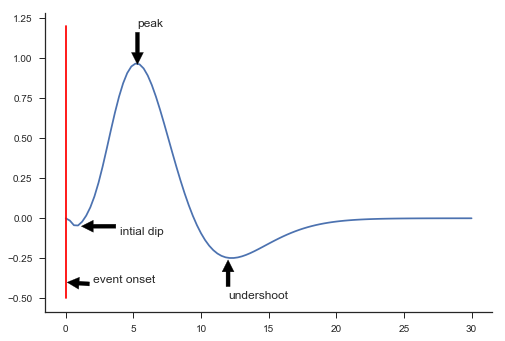

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-03-05 15:11:13.524636. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [24]:
sns.set_style('ticks')

hrf = [hrf_gen(t) for t in np.linspace(0,30,100)]

plt.plot(np.linspace(0,30,100), hrf)
plt.plot([0,0], [-.5, 1.2], c='red')

plt.annotate('event onset', xy=(0, -.4), xytext=(2, -.4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('intial dip', xy=(1, -.05), xytext=(4, -.1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('peak', xy=(5.3, .95), xytext=(5.3, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('undershoot', xy=(12, -.25), xytext=(12, -.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

sns.despine()

**Initial dip
    The increase in the BOLD signal is proceeded by a smaller decrease which is called an initial dip. The initial dip is defined as the short term decreased in the MR signal immediately following the onset of neuronal activity but before the main increase of the hemodynamic response and this dip may result from initial oxygen extraction.

*Not all scanners will capture the initial dip because the amplitude of the dip scales dramatically with the field strength. Some scientists believe the dip represents an increase in oxygen extraction before the increase in blood flow.*

**Peak
    The peak is defined as the maximum amplitude of the hemodynamic response and occurs about 4-6 seconds following the stimulus/onset. This is, in essence, the time lag that characterizes the HRF (as discussed above).

**Undershoot 
    After this peak, the BOLD signal decreases in amplitude to below baseline levels, and remains there for an extended period. This is caused by elevated blood volume in relation to blood flow, resulting in deoxygenated hemoglobin. 

/usr/local/lib/python3.6/site-packages/nipy/modalities/fmri/hemodynamic_models.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)


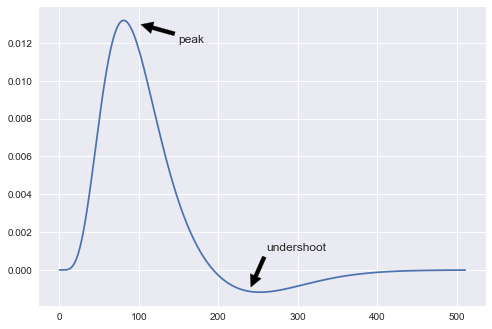

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-03-05 15:06:56.606338. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
plt.plot(np.linspace(0,511,512), 
         hemodynamic_models.spm_hrf(1))

plt.annotate('peak', xy=(100, .013), xytext=(150, .012),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('undershoot', xy=(240, -.001), xytext=(260, 0.001),
            arrowprops=dict(facecolor='black', shrink=0.05))

However, many experimental designs have different event onsets occuring close together. 

GRAPH OF MULTIPLE SHOULD GO HERE

With multiple onset events, the hemodynamic respones never has a change to return to baseline. Therefore, the variance of the BOLD signal across time is small. This is why jitters are so important. They increase the variance of the signal. 

The best way to deal with multiple onset events is to convolve the timeseries.

MORE CODE HERE